In [1]:
import tensorflow as tf
import os

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
tf.__version__

'2.2.0'

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


In [6]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [7]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

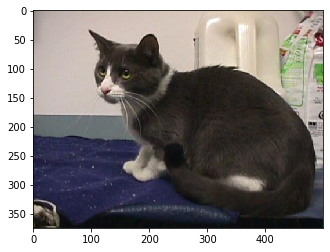

In [8]:
plt.imshow(cat4)

In [9]:
cat4.shape

(375, 500, 3)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255.0,
                              shear_range=0.2,
                              zoom_range = 0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [12]:
t_image_gen = ImageDataGenerator(rescale=1/255.0)

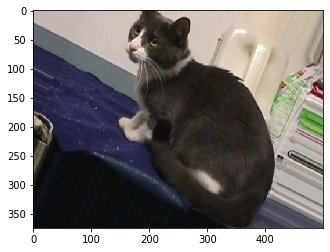

In [13]:
plt.imshow(image_gen.random_transform(cat4))

In [14]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [15]:
input_shape = (150,150,3)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPool2D, Dense

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [19]:
batch_size=16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [20]:
test_image_gen = t_image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [21]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [22]:
test_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [23]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
150/150 [==============================] - 35s 236ms/step - loss: 0.7050 - accuracy: 0.5258 - val_loss: 0.6610 - val_accuracy: 0.6406
